<a href="https://colab.research.google.com/github/ohkt4/pr/blob/main/Assign2_feed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
((trainX,trainY),(testX,testY)) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0],28*28*1))
testX = testX.reshape((testX.shape[0],28*28*1))

trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(256,input_shape=(784,),activation="relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

Adm = Adam(0.01)
model.compile(loss = "categorical_crossentropy",optimizer=Adm,metrics = ["accuracy"])
H = model.fit(trainX,trainY,validation_data = (testX,testY),epochs=100,batch_size = 128)

Epoch 1/100
469/469 [==============================] - 5s 8ms/step - loss: 0.2501 - accuracy: 0.9233 - val_loss: 0.1431 - val_accuracy: 0.9573
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1276 - accuracy: 0.9631 - val_loss: 0.1753 - val_accuracy: 0.9485
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1065 - accuracy: 0.9703 - val_loss: 0.1137 - val_accuracy: 0.9671
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0929 - accuracy: 0.9734 - val_loss: 0.1233 - val_accuracy: 0.9684
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0856 - accuracy: 0.9760 - val_loss: 0.1257 - val_accuracy: 0.9685
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0805 - accuracy: 0.9780 - val_loss: 0.1234 - val_accuracy: 0.9711
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0701 - accuracy: 0.9811 - val_loss: 0.1294 - val_accuracy: 0.

In [ ]:
predictions = model.predict(testX,batch_size = 128)
print(classification_report(testY.argmax(axis =1),
predictions.argmax(axis=1),
target_names=[str(x)for x in lb.classes_]))

79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.96      0.97       958
           7       0.90      0.99      0.94      1028
           8       0.94      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



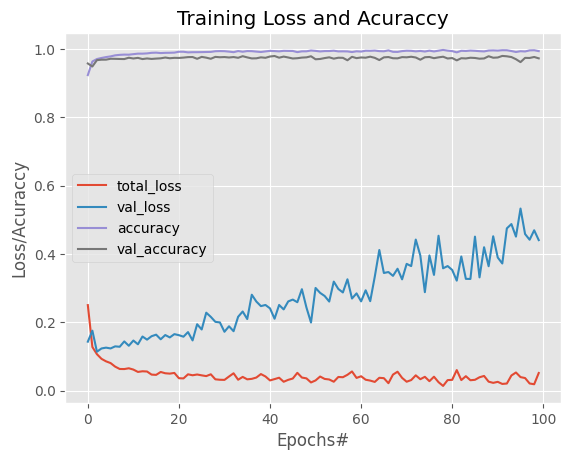

In [ ]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,100),H.history["loss"],label = "total_loss")
plt.plot(np.arange(0,100),H.history["val_loss"],label = "val_loss")
plt.plot(np.arange(0,100),H.history["accuracy"],label = "accuracy")
plt.plot(np.arange(0,100),H.history["val_accuracy"],label = "val_accuracy")
plt.title("Training Loss and Acuraccy")
plt.xlabel("Epochs#")
plt.ylabel("Loss/Acuraccy")
plt.legend()